In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms

In [2]:
%matplotlib inline
torch.set_printoptions(sci_mode=False)

In [3]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                               ])

trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

In [4]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim = 1),
                     )

# Negative Log Likelihood Loss as Loss fn and Stochastic Gradient Descent as Optimiser
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(0,epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        running_loss += loss
        
        loss.backward()
        optimizer.step()
    
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.9019405841827393
Training loss: 0.8662782907485962
Training loss: 0.5472421050071716
Training loss: 0.4447811245918274
Training loss: 0.39465397596359253


In [5]:
# sample for testing the model
images, labels = next(iter(trainloader))
img = images[0].view(1, 784)

with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)

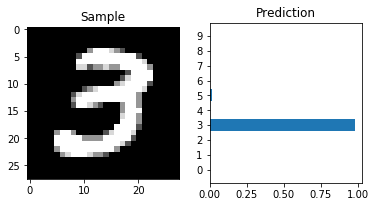

In [6]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (6,9))

ax1.set_title("Sample")
ax1.imshow(img.view(28,28).numpy().squeeze(), cmap="Greys_r")

ax2.set_title("Prediction")
ax2.barh(np.arange(10),ps.numpy().squeeze())
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(np.arange(10))
ax2.set_aspect(0.1)
